<a href="https://colab.research.google.com/github/AnkitaSK/NamasteBot/blob/main/NamasteBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install unstructured[pdf] PyPDF2 camelot Pillow sentence-transformers chromadb google-generativeai

In [ ]:
pip install -U langchain-community

  Using cached SQLAlchemy-2.0.37-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.6 kB)
Using cached SQLAlchemy-2.0.37-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 0.7.10
    Uninstalling SQLAlchemy-0.7.10:
      Successfully uninstalled SQLAlchemy-0.7.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
camelot 12.6.29 requires SQLAlchemy<0.8.0,>=0.7.7, but you have sqlalchemy 2.0.37 which is incompatible.


In [ ]:
from PyPDF2 import PdfReader
import camelot
from PIL import Image
from sentence_transformers import SentenceTransformer
from chromadb import Client
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
import google.generativeai as genai
import io
import zlib
import imageio.v3 as iio

In [ ]:
# Load your PDF file
# reader = PdfReader("/content/Haridwar-Travel-Guide-by-ixigo.com.pdf")

In [ ]:
# def process_pdf_page(page):
#   # extract text
#   text = page.extract_text()

#   return text

In [ ]:
# for page_num in range(len(reader.pages)):
#     page = reader.pages[page_num]
#     text = process_pdf_page(page)



In [ ]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (140 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,306 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,640 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

In [ ]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

## Extract data

In [ ]:
from unstructured.partition.pdf import partition_pdf


pdf_file_name = "Haridwar-Travel-Guide-by-ixigo.com.pdf"
pdf_folder_path = "/content/data/images/"

raw_pdf_elements = partition_pdf(
    filename=pdf_file_name,
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path=pdf_folder_path,
)

In [ ]:
set([str(type(el)) for el in raw_pdf_elements])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [ ]:
elements = raw_pdf_elements[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'd3700d72-9457-404f-9523-080d21130af0',
 'text': '',
 'metadata': {'coordinates': {'points': ((72.22222222222221,
     878.2222222222221),
    (72.22222222222221, 1267.8055555555554),
    (591.6666666666666, 1267.8055555555554),
    (591.6666666666666, 878.2222222222221)),
   'system': 'PixelSpace',
   'layout_width': 2339,
   'layout_height': 1653},
  'last_modified': '2025-02-01T07:29:35',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 3,
  'image_path': '/content/figures/figure-3-19.jpg'}}

In [ ]:
# Categorize extracted elements from a PDF into tables and texts.
tables = []
texts = []
for element in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        tables.append(str(element))
    elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
        texts.append(str(element))


In [ ]:
print(texts)

["ixigo\n\nHaridwar Travel Guide - http://www.ixigo.com/travel-guide/haridwar\n\nHaridwar\n\nRe\n\nOne of the seven holiest places for Hindus, Haridwar literally means a 'gateway to God', succinctly capturing its pious and spiritual character. Come here for an epiphanic union with the almighty, or just sit by the scintillating river Ganga and watch your stress float away with the swishing water and a cool, balming breeze.\n\n”\n\né&\n\né&\n\nThis Pdf and its contents are copyright © 2013,ixigo.com, all rights reserved. ixigo logo, the character and all other marks displayed herein are registered and/or common law trademarks of ixigo.com and/or third parties.\n\nFam ous For\n\nPlces To VsitRelyDusCity\n\nThe holy town of Haridwar marks the arrival of the River Ganga into the Northern plains, the first time since its origin at Gaumukh, Gangotri. Visitors hail from all across the country, and globe, for a dip in the holy waters of the river, which is believed to wash away one's sins and h

In [ ]:
print(tables)

[]


In [ ]:
# Get the images from the CompositeElement objects
def get_images(chunks):
    images = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                # print(dir(el.metadata))
                if "Image" in str(type(el)):
                    images.append(el.metadata.image_path)
    return images

images = get_images(raw_pdf_elements)

In [ ]:
images[0]

'/content/figures/figure-1-1.jpg'

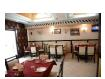

In [ ]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images_base64[25])

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.5 MB/s eta 0:00:00


In [ ]:
from langchain.text_splitter import CharacterTextSplitter
# Optional: Enforce a specific token size for texts
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=10000, chunk_overlap=0
)
joined_texts = " ".join(texts)
texts_4k_token = text_splitter.split_text(joined_texts)

In [ ]:
# def encode_image(image_path: str) -> str:
#     """Getting the base64 string"""
#     with open(image_path, "rb") as image_file:
#         return base64.b64encode(image_file.read()).decode("utf-8")


## Use Gemini API

In [ ]:
import google.generativeai as genai
from google.colab import userdata
import os

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

## Summarize the data

# Text summary

In [ ]:
MODEL_NAME = "models/gemini-1.5-pro-latest"
model = genai.GenerativeModel(model_name=MODEL_NAME)

def make_prompt(element):
  return f"""You are an assistant tasked with summarizing tables and text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text or table elements. \
    Give a concise summary of the table or text that is well optimized for retrieval. Table or text: {element} """

def generate_text_summaries(texts, tables, summarize_texts=False):
  """
    Summarize text elements

    Args:
      texts: List of str
      tables: List of str
      summarize_texts: Bool to summarize texts
  """

  text_summaries, table_summaries = [], []
  # print(dir(model))

  if texts and summarize_texts:
    text_summaries = [
            model.generate_content(make_prompt(text)).candidates[0].content.parts[0].text
            for text in texts
        ]

  if tables:
    table_summaries = [
            model.generate_content(make_prompt(table)).candidates[0].content.parts[0].text
            for table in tables
        ]

  return text_summaries, table_summaries


In [ ]:
text_summaries, table_summaries = generate_text_summaries(texts, tables, summarize_texts=True)

In [ ]:
text_summaries

["Haridwar, a holy Hindu city, is a gateway to God where the Ganges River enters the Northern plains.  Pilgrims bathe in the holy waters at Har ki Pauri, believed to wash away sins.  Key sites include Chandi Devi Temple, Maya Devi Temple, and Mansa Devi Temple.  Haridwar hosts the Kumbh Mela every 12 years.  Evening aarti ceremonies at Har ki Pauri are a major attraction.  Rajaji National Park offers wildlife viewing.  Patanjali Yogpeeth's Padartha Farms is a large food park.  Bara Bazaar is a popular market.  The city is vegetarian and prohibits alcohol.\n",
 'Haridwar monthly weather and Har Ki Pauri highlight.  Jan-May and Nov-Dec: Cold, heavy woolens. June-Oct: Pleasant, light woolens, umbrella (except Oct).  Har Ki Pauri:  Holy Ghat, Ganga touches plains, Vishnu footprint, evening Aarti with floating lamps.\n',
 'Haridwar religious sites: Mansa Devi Temple (ropeway access, wish-fulfilling), Ganesh Ghat (near Hanuman Temple, Dam Kothi, Ganga views), and Mercury Temple (Paradeshwar 

In [ ]:
table_summaries

[]

# Image summary

In [ ]:
# also called encoding of image
def image_to_base64(image_path):
    # Open the image file in binary mode
    with open(image_path, "rb") as image_file:
        # Read the image content and encode it in base64
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_image



In [ ]:
image_path = "/content/figures/figure-1-1.jpg"
image_base64 = image_to_base64(image_path)
image_base64

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABFAJADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDpviF4t1K21ltPtJmhjiHJXgk/Wr3w38U3+pXctheyGUBdyseo/GtnxX4Ct/EV0LuOYwz4w3HDVZ8J+C7fwz5kvmmadxgsR0HtWl1ymt48tjqaKKKzMgooooAzPEGovpWiXN5GMui/L9a8QXxtrgvhc/bXzuztydv5V71fWUW

In [ ]:
def summarize_image(base64_image):
    """Generate a summary from an image using Gemini API."""
    response = model.generate_content(
        contents=[
            {
                "role": "user",
                "parts": [
                    {"text": "Summarize the content of this image in a few sentences."},
                    {
                        "inline_data": {
                            "mime_type": "image/jpeg",  # Change based on image type
                            "data": base64_image
                        }
                    }
                ]
            }
        ]
    )

    return response.candidates[0].content.parts[0].text


def generate_image_summaries(images_base64):
    """Generate summaries for a list of images."""
    image_summaries = []
    for image_base64 in images_base64:
        summary = summarize_image(image_base64)
        image_summaries.append(summary)

    return image_summaries


In [ ]:
# image_summary = summarize_image(image_base64)
images_base64 = [image_to_base64(image) for image in images]
print(images_base64[3])

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEIAQgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiue8R679hje1gJ84rl3HO0HsPeplJRV2NK7sbi3MDuyLPGzqcFQ4JF

In [ ]:
image_summaries = generate_image_summaries(images_base64)

In [ ]:
image_summaries

['The image shows the logo for ixigo.com.  The "ix" is orange, while the "igo" and ".com" are purple. The overall design is simple and modern.\n',
 "The image shows a pair of grey quotation marks, oriented to indicate the beginning of a quote. They are slightly pixelated, suggesting they've been enlarged or are from a lower-resolution source.",
 'The image depicts a simple, gently sloping curved line. It starts at the top left and curves downwards to the bottom right, resembling a shallow crescent or a portion of a larger circle. The line is thin and appears gray or light in color.\n',
 "A cartoon male character, dressed as a tour guide or explorer, is depicted. He wears khaki shorts, vest, hat, and boots, and is equipped with a camera and whistle. He's smiling and pointing towards something to his right, presumably directing attention to a point of interest.\n",
 'A cartoon tour guide, wearing khaki attire, a safari hat, and glasses, is pointing towards something off-screen to his lef

## Store in vector db - Chroma

In [ ]:
import chromadb
from sentence_transformers import SentenceTransformer

In [ ]:
# Initialize ChromaDB client
chroma_client = chromadb.PersistentClient(path="./chroma_db")

# # Create a collection for storing summaries
# collection = chroma_client.get_or_create_collection(name="summaries")
# Create a collection for storing summaries with embeddings
collection = chroma_client.get_or_create_collection(name="summaries_with_embeddings")

# Load Sentence-Transformers model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
def store_summary_in_chroma(id, summary, metadata):
    """Store summary in ChromaDB."""
    collection.add(
        ids=[id],
        documents=[summary],
        metadatas=[metadata],
        embeddings=[embedding_model.encode(summary).tolist()]
    )

In [ ]:
# Store Summaries in ChromaDB
for i, summary in enumerate(text_summaries):
    store_summary_in_chroma(f"text_{i}", summary, {"type": "text"})

if table_summaries:
  for i, summary in enumerate(table_summaries):
      store_summary_in_chroma(f"table_{i}", summary, {"type": "table"})

for i, summary in enumerate(image_summaries):
    store_summary_in_chroma(f"image_{i}", summary, {"type": "image"})

In [ ]:
def retrieve_similar_summaries(query):
    """Retrieve the most relevant stored summaries."""
    results = collection.query(query_texts=[query], n_results=3)
    return results["documents"]


In [ ]:
# Example Retrieval Query
query = "Tell me about a holy city"
retrieved_summaries = retrieve_similar_summaries(query)
print("🔍 Retrieved Summaries:", retrieved_summaries)

🔍 Retrieved Summaries: [["Haridwar, a holy Hindu city, is a gateway to God where the Ganges River enters the Northern plains.  Pilgrims bathe in the holy waters at Har ki Pauri, believed to wash away sins.  Key sites include Chandi Devi Temple, Maya Devi Temple, and Mansa Devi Temple.  Haridwar hosts the Kumbh Mela every 12 years.  Evening aarti ceremonies at Har ki Pauri are a major attraction.  Rajaji National Park offers wildlife viewing.  Patanjali Yogpeeth's Padartha Farms is a large food park.  Bara Bazaar is a popular market.  The city is vegetarian and prohibits alcohol.\n", 'The image shows a bustling scene at a Hindu temple complex, likely in India.  Several ornate temple structures with tiered towers are visible, surrounded by a large crowd of people.  The setting appears to be near a river or body of water, with hills visible in the background.\n', 'A large crowd of people gathers along the banks and in the waters of a river, likely the Ganges, at a significant Hindu pilgri

## TODO setup multimodel embedding models
#### Need an image embedding model (like CLIP) to generate embeddings for images and a text embedding model (like sentence-transformers) for text.



# RAG Pipeline